# Linear Regression 

## Importing libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [25]:
url="http://bit.ly/w-data"
st=pd.read_csv(url)
st.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
X = st.iloc[:, :-1].values  
y = st.iloc[:, 1].values 

In [44]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [45]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Calculating the null values in the dataset

In [26]:
st.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [27]:
st.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
st.shape

(25, 2)

In [29]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualising the dataset: scatterplot

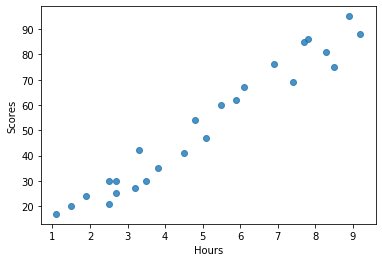

In [30]:
sb.regplot(x='Hours', y='Scores', scatter=True,
          fit_reg=False, data=st)

In [31]:
st.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [32]:
st.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Visualising the dataset: correlation heatmap

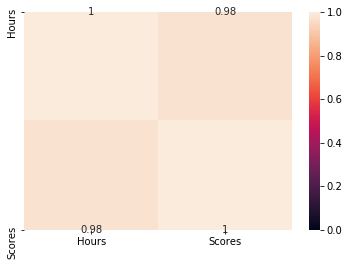

In [33]:
sb.heatmap(st.corr(), vmin=0, vmax=1, annot=True)

## Visualising the dataset: boxplots


C:\Users\Praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


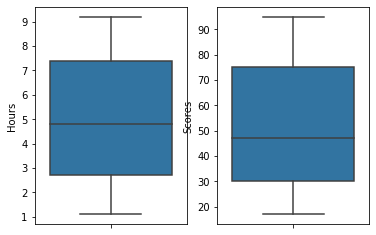

In [34]:
fig, ax=plt.subplots(1, 2)
sb.boxplot(y=st['Hours'], ax=ax[0])
sb.boxplot(y=st['Scores'], ax=ax[1])
fig.show()

## Visualising the dataset: histograms


C:\Users\Praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


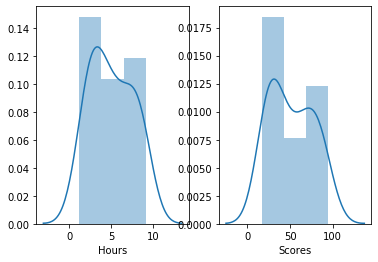

In [35]:
fig, ax=plt.subplots(1, 2)
sb.distplot(st['Hours'], ax=ax[0])
sb.distplot(st['Scores'], ax=ax[1])
fig.show()

## Splitting the features into training and test data


In [46]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test=train_test_split(X, y,test_size=0.3, random_state=0)


## Creating an instance of LinearRegression and fitting the model


In [49]:
from sklearn.linear_model import LinearRegression  
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Retrieving the predictions from the model


In [58]:
y_pred1=lr.predict(x_test)
y_pred1

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [60]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [59]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

In [57]:
pd.DataFrame(y_pred1,y_test)

,0
20,17.053665
27,33.694229
69,74.806209
30,26.842232
62,60.123359
35,39.567369
24,20.969092
86,78.721636


## Calculating the accuracy and error of the test dataset

In [52]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred1))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("R-squared:", metrics.r2_score(y_test, y_pred1))

Mean Absolute Error: 4.419727808027652
Root Mean Squared Error: 4.792191274636315
R-squared: 0.9568211104435257


## Visualising the predicted (right) and actual (left) values in the scatterplots


C:\Users\Praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


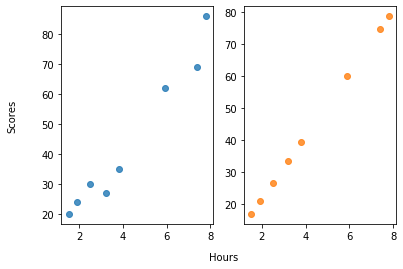

In [53]:
fig, ax=plt.subplots(1, 2)
sb.regplot(x=x_test, y=y_test, scatter=True, 
           fit_reg=False, ax=ax[0])
sb.regplot(x=x_test, y=y_pred1, scatter=True, 
           fit_reg=False, ax=ax[1])
fig.text(0.5, 0, 'Hours', horizontalalignment='center')
fig.text(0, 0.5, 'Scores', verticalalignment='center', rotation='vertical')
fig.show()

## predicted score if a student study for 9.25 hrs in a day 

In [69]:
print("Predicted score: {}".format(lr.predict([[9.5]])))
print("Tast completed!!!")

Predicted score: [95.36219891]
Tast completed!!!
